In [1]:
import numpy as np
import random
from scipy.spatial.distance import pdist
from fastcluster import linkage
from polo import optimal_leaf_ordering
from scipy.cluster.hierarchy import leaves_list
import utils as ut
import numpy.ma as ma

In [2]:
def return_permData(data):
    
    D = pdist(data, 'euclidean')  # distance
    Z = linkage(D, 'ward')
    optimal_Z = optimal_leaf_ordering(Z, D)
    opt_order = leaves_list(optimal_Z)
    data = data[opt_order]
    
    data = data.T  # transpose
    D = pdist(data, 'euclidean')  # distance
    Z = linkage(D, 'ward')
    optimal_Z = optimal_leaf_ordering(Z, D)
    opt_order_columns = leaves_list(optimal_Z)
    data = data[opt_order_columns]
    
    return data.T

In [3]:
X_0 = np.genfromtxt("Original_synthetic_matrix.csv", delimiter=",")
X_0_polo = return_permData(X_0)  

In [4]:
# create 4 more synthetic data matrices
m, n, rank = 500, 300, 3

def return_synth_matrix(seed):
    np.random.seed(seed)
    random.seed(seed)
    A = ma.masked_array(np.random.rand(m, rank), mask=np.zeros((m, rank)))  # uniform distribution over [0, 1)
    B = ma.masked_array(np.random.rand(rank, n), mask=np.zeros((rank, n)))
    return ut.max_plus(A, B)

X_1, X_2, X_3, X_4 = return_synth_matrix(53), return_synth_matrix(74), return_synth_matrix(100), return_synth_matrix(200)
# save matrices
np.savetxt("Synthetic_matrix_1.csv", X_1, delimiter=",")
np.savetxt("Synthetic_matrix_2.csv", X_2, delimiter=",")
np.savetxt("Synthetic_matrix_3.csv", X_3, delimiter=",")
np.savetxt("Synthetic_matrix_4.csv", X_4, delimiter=",")
# polo
X_1_polo, X_2_polo, X_3_polo, X_4_polo = return_permData(X_1), return_permData(X_2), return_permData(X_3), return_permData(X_4)      

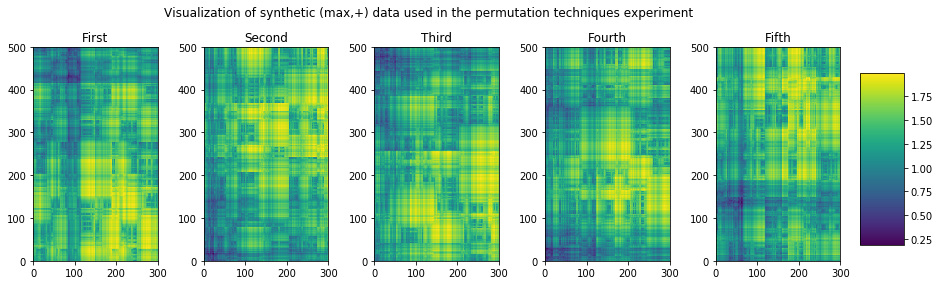

In [5]:
# plotting all values of synthetic matrix, to check are matrices different enough
ut.plot_synthetic_matrices(X_0_polo, X_1_polo, X_2_polo, X_3_polo, X_4_polo, "Visualization of synthetic (max,+) data used in the permutation techniques experiment", "synthetic_experiments/synthetic_permutation.png")